# What this notebook does:

* This notebook finds number of differentially expressed genes between unperturbed and signaling perturbation conditions across various cell states.
* This analysis was used to generate the figure 3A and Table S5 for McCauley/Kukreja et. al. 2024 paper

# Set up

In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as pl, scipy.sparse as ssp
import scanpy as sc,scanpy.external as sce
import sys
sys.path.append('../../helper_functions/')
import helper_functions_py3 as hf

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=100)  # low dpi (dots per inch) yields small inline figures

import random
import scipy.stats  as ss
import statsmodels.stats.multitest as multitest
from matplotlib.patches import Rectangle
import seaborn as sn
from sklearn.neighbors import NearestNeighbors
import pickle

# Load data

In [2]:
# load indrops data
# update this with the path where your anndata objects are stored !!
anndata_path = '../../data/anndata_objects/'
adata = sc.read_h5ad('../../data/anndata_objects/all_indrops_data.h5ad')

In [3]:
# filter genes:
sc.pp.filter_genes(adata, min_cells=3)
sc.pp.filter_genes(adata, min_counts=6)

# counts normalize data:
sc.pp.normalize_per_cell(adata, counts_per_cell_after=1e4)


filtered out 6937 genes that are detected in less than 3 cells
filtered out 2906 genes that are detected in less than 6 counts
normalizing by total count per cell
    finished (0:00:02): normalized adata.X and added    'n_counts', counts per cell before normalization (adata.obs)


# Find differentially expressed genes

In [4]:
# subset data into specific cell states:

adata_basal = adata[adata.obs.cell_states.isin(['Basal'])].copy()
adata_secretory = adata[adata.obs.cell_states.isin(['Club','Goblet'])].copy()
adata_multiciliated = adata[adata.obs.cell_states.isin(['Multiciliated'])].copy()
adata_rare = adata[adata.obs.cell_states.isin(['Ionocyte', 'PNEC','Tuft' ])].copy()

### Basal

In [5]:
# initialize dge dictionary:
dge_basal = {}

# subset control cells:
adata_basal_ctrl = adata_basal[adata_basal.obs.condition == 'None'].copy()

# find dge between perturbed and control data:
for conditions in set(adata.obs.condition) - set(['None']):
    print(conditions)
    adata_temp = adata_basal[adata_basal.obs.condition == conditions].copy()
    dge_basal[conditions] = hf.dge(adata_basal_ctrl, adata_temp, alpha = 0.05,pseudocount = 1)
    print(conditions, ' done')


CHIR
CHIR  done
BMP4
BMP4  done
TNFA
TNFA  done
FGF2
FGF2  done
HGF
HGF  done
TGFB1
TGFB1  done
Leptin
Leptin  done
ActA
ActA  done
Adipo
Adipo  done
IFNA
IFNA  done
IGF1
IGF1  done
OSM
OSM  done
EGF
EGF  done
IFNG
IFNG  done
IL17A
IL17A  done
IL13
IL13  done
FGF10
FGF10  done


In [6]:
del adata_temp
del adata_basal_ctrl

In [9]:
# save the result into a pickle file:
pickle.dump(dge_basal, open("../../data/csv_txt_files/dge_basal.p", "wb"))  # save it into a file named save.p


### Secretory

In [15]:
# initialize dge dictionary:
dge_secretory = {}

# subset control cells:
adata_secretory_ctrl = adata_secretory[adata_secretory.obs.condition == 'None'].copy()

# find dge between perturbed and control data:
for conditions in set(adata.obs.condition) - set(['None']):
    print(conditions)
    adata_temp = adata_secretory[adata_secretory.obs.condition == conditions].copy()
    dge_secretory[conditions] = hf.dge(adata_secretory_ctrl, adata_temp, alpha = 0.05,pseudocount = 1)
    print(conditions, ' done')

del adata_temp
del adata_secretory_ctrl

# save the result into a pickle file:
pickle.dump(dge_secretory, open("../../data/csv_txt_files/dge_secretory.p", "wb"))  # save it into a file named save.p


CHIR
CHIR  done
BMP4
BMP4  done
TNFA
TNFA  done
FGF2
FGF2  done
HGF
HGF  done
TGFB1
TGFB1  done
Leptin
Leptin  done
ActA
ActA  done
Adipo
Adipo  done
IFNA
IFNA  done
IGF1
IGF1  done
OSM
OSM  done
EGF
EGF  done
IFNG
IFNG  done
IL17A
IL17A  done
IL13
IL13  done
FGF10
FGF10  done



### Multiciliated

In [11]:

# initialize dge dictionary:
dge_multiciliated = {}

# subset control cells:
adata_multiciliated_ctrl = adata_multiciliated[adata_multiciliated.obs.condition == 'None'].copy()

# find dge between perturbed and control data:
for conditions in set(adata.obs.condition) - set(['None']):
    print(conditions)
    adata_temp = adata_multiciliated[adata_multiciliated.obs.condition == conditions].copy()
    dge_multiciliated[conditions] = hf.dge(adata_multiciliated_ctrl, adata_temp, alpha = 0.05,pseudocount = 1)
    print(conditions, ' done')

del adata_temp
del adata_multiciliated_ctrl

# save the result into a pickle file:
pickle.dump(dge_multiciliated, open("../../data/csv_txt_files/dge_multiciliated.p", "wb"))  # save it into a file named save.p


CHIR
CHIR  done
BMP4
BMP4  done
TNFA
TNFA  done
FGF2
FGF2  done
HGF
HGF  done
TGFB1
TGFB1  done
Leptin
Leptin  done
ActA
ActA  done
Adipo
Adipo  done
IFNA
IFNA  done
IGF1
IGF1  done
OSM
OSM  done
EGF
EGF  done
IFNG
IFNG  done
IL17A
IL17A  done
IL13
IL13  done
FGF10
FGF10  done


### Rare

In [12]:
# initialize dge dictionary:
dge_rare = {}

# subset control cells:
adata_rare_ctrl = adata_rare[adata_rare.obs.condition == 'None'].copy()

# find dge between perturbed and control data:
for conditions in set(adata.obs.condition) - set(['None','BMP4', 'IFNG']):
    print(conditions)
    adata_temp = adata_rare[adata_rare.obs.condition == conditions].copy()
    dge_rare[conditions] = hf.dge(adata_rare_ctrl, adata_temp, alpha = 0.05,pseudocount = 1)
    print(conditions, ' done')

del adata_temp
del adata_rare_ctrl

# save the result into a pickle file:
pickle.dump(dge_rare, open("../../data/csv_txt_files/dge_rare.p", "wb"))  # save it into a file named save.p


CHIR
CHIR  done
TNFA
TNFA  done
FGF2
FGF2  done
HGF
HGF  done
TGFB1
TGFB1  done
Leptin
Leptin  done
ActA
ActA  done
Adipo
Adipo  done
IFNA
IFNA  done
IGF1
IGF1  done
OSM
OSM  done
EGF
EGF  done
IL17A
IL17A  done
IL13
IL13  done
FGF10
FGF10  done


# Plot number of differentially expressed genes

In [13]:
condition_names = list(set(adata.obs.condition) - set(['None']))

In [16]:
diff_num_multiciliated = {}
for conditions in condition_names:
    diff_num_multiciliated[conditions] = len(dge_multiciliated[conditions]['diff_genes'])
    
    

In [17]:
diff_num_secretory = {}
for conditions in condition_names:
    diff_num_secretory[conditions] = len(dge_secretory[conditions]['diff_genes'])
    
    

In [18]:
diff_num_basal = {}
for conditions in condition_names:
    diff_num_basal[conditions] = len(dge_basal[conditions]['diff_genes'])
    
    

In [19]:
diff_num_rare = {}
for conditions in dge_rare.keys():
    diff_num_rare[conditions] = len(dge_rare[conditions]['diff_genes'])
    
    

In [20]:
diff_num_all = pd.DataFrame([pd.Series(diff_num_basal), 
                             pd.Series(diff_num_secretory),
                             pd.Series(diff_num_multiciliated),
                            pd.Series(diff_num_rare)])

diff_num_all.index = ['Basal','Secretory',  'Multiciliated', 'Rare']

In [21]:
diff_num_all = diff_num_all[pd.Series(diff_num_basal).sort_values().index]

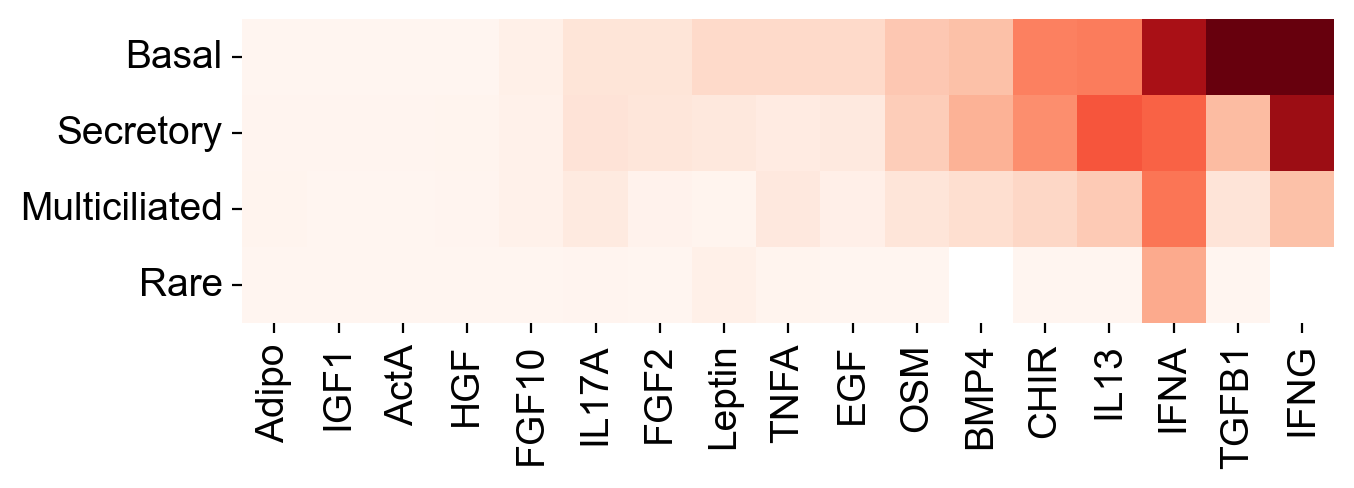

In [25]:

pl.figure(figsize = (7,2))


sn.heatmap(diff_num_all, cmap = 'Reds', cbar_kws={"shrink": 0.5} ,
           vmax = 250, vmin=0, cbar = False)

#pl.title('Number of differentialy expressed genes')
pl.savefig('../../figures/Fig3A_dge_celltypes.pdf', dpi=300,bbox_inches='tight')

# Make table for DGEs

In [24]:
for conditions in diff_num_all.columns:
    
    pd_basal = pd.DataFrame([dge_basal[conditions]['diff_genes'],
                            'Basal'*np.ones(dge_basal[conditions]['diff_genes'].shape[0], dtype = object),
                            dge_basal[conditions]['FC'][dge_basal[conditions]['mask']], 
                            dge_basal[conditions]['p_value'][dge_basal[conditions]['mask']]]).T
    
    pd_secretory = pd.DataFrame([dge_secretory[conditions]['diff_genes'],
                            'Secretory'*np.ones(dge_secretory[conditions]['diff_genes'].shape[0], dtype = object),
                            dge_secretory[conditions]['FC'][dge_secretory[conditions]['mask']], 
                            dge_secretory[conditions]['p_value'][dge_secretory[conditions]['mask']] ]).T
    
    pd_multiciliated = pd.DataFrame([dge_multiciliated[conditions]['diff_genes'],
                            'Multiciliated'*np.ones(dge_multiciliated[conditions]['diff_genes'].shape[0], dtype = object),
                            dge_multiciliated[conditions]['FC'][dge_multiciliated[conditions]['mask']], 
                            dge_multiciliated[conditions]['p_value'][dge_multiciliated[conditions]['mask']] ]).T
    
    if (conditions != 'BMP4')&(conditions != 'IFNG'):
        pd_rare = pd.DataFrame([dge_rare[conditions]['diff_genes'],
                            'Rare'*np.ones(dge_rare[conditions]['diff_genes'].shape[0], dtype = object),
                            dge_rare[conditions]['FC'][dge_rare[conditions]['mask']], 
                            dge_rare[conditions]['p_value'][dge_rare[conditions]['mask']] ]).T    
    
    pd_temp = pd.concat([pd_basal, pd_secretory, pd_multiciliated, pd_rare])
    pd_temp.columns = ['Genes', 'Cell type','Log2FC', 'FDR']
    pd_temp.index = np.arange(pd_temp.shape[0])
    
    pd_temp.to_csv('../../data/csv_txt_files/dge_{}_celltypes.csv'.format(conditions), sep = ',')